A1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

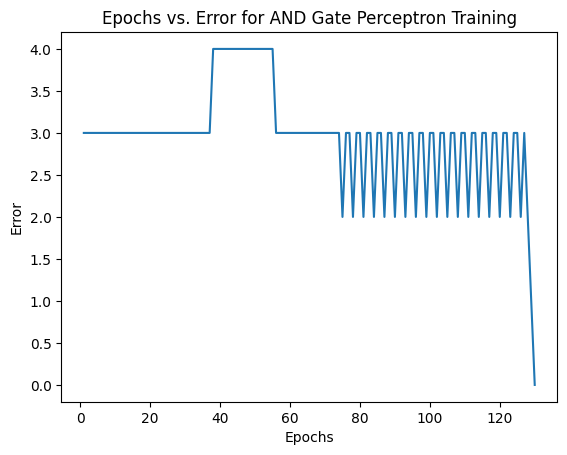

Converged in 130 epochs.
Final weights: [-0.1   0.1   0.05]


In [ ]:
def step_activation(x):
    return 1 if x >= 0 else 0

W = np.array([10, 0.2, -0.75])
learning_rate = 0.05
convergence_error = 0.002
max_epochs = 1000

input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target_output = np.array([0, 0, 0, 1])

error_values = []
epochs = 0
while True:
    total_error = 0
    for i in range(len(input_data)):

        weighted_sum = W[0] + W[1] * input_data[i, 0] + W[2] * input_data[i, 1]
        predicted_output = step_activation(weighted_sum)
        error_i = target_output[i] - predicted_output
        total_error += error_i ** 2
        W[0] += learning_rate * error_i
        W[1] += learning_rate * error_i * input_data[i, 0]
        W[2] += learning_rate * error_i * input_data[i, 1]

    error_values.append(total_error)
    epochs += 1

    if total_error <= convergence_error or epochs >= max_epochs:
        break

# Plot the epochs vs. error values
plt.plot(range(1, epochs + 1), error_values)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs. Error for AND Gate Perceptron Training')
plt.show()

print(f"Converged in {epochs} epochs.")
print("Final weights:", W)


A2

Training with Bi-Polar Step Activation Function:
Training with Sigmoid Activation Function:
Training with ReLU Activation Function:
Bi-Polar Step did not converge within the maximum 1000 epochs.
Sigmoid did not converge within the maximum 1000 epochs.
ReLU did not converge within the maximum 1000 epochs.


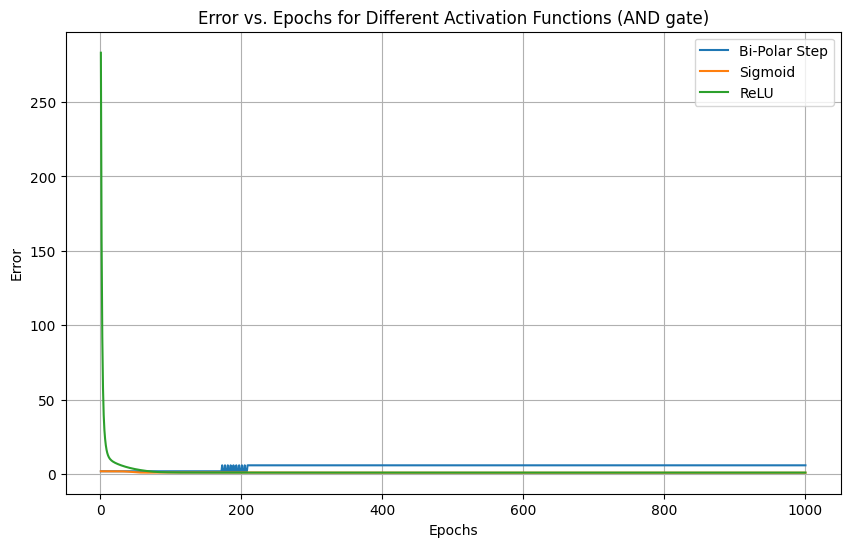

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return 1 if x > 0 else 0

def bipolar_step_function(x):
    return 1 if x > 0 else -1

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def relu_function(x):
    return max(0, x)

W0, W1, W2 = 10, 0.2, -0.75
learning_rate = 0.05
epochs = 1000
convergence_error = 0.002

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

activation_functions = [bipolar_step_function, sigmoid_function, relu_function]
activation_names = ["Bi-Polar Step", "Sigmoid", "ReLU"]

iterations_dict = {name: [] for name in activation_names}
error_dict = {name: [] for name in activation_names}

for activation, activation_name in zip(activation_functions, activation_names):
    W0, W1, W2 = 10, 0.2, -0.75

    print(f"Training with {activation_name} Activation Function:")
    error_list = []
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(X)):
            weighted_sum = W0 + W1 * X[i, 0] + W2 * X[i, 1]
            output = activation(weighted_sum)
            error = y[i] - output

            W0 += learning_rate * error
            W1 += learning_rate * error * X[i, 0]
            W2 += learning_rate * error * X[i, 1]

            total_error += error ** 2
        if total_error <= convergence_error:
            print(f"{activation_name}: Converged after {epoch + 1} epochs.")
            iterations_dict[activation_name].append(epoch + 1)
            break
        error_list.append(total_error)

    error_dict[activation_name] = error_list

for activation_name, iterations in iterations_dict.items():
    if iterations:
        print(f"{activation_name} took an average of {np.mean(iterations)} epochs to converge.")
    else:
        print(f"{activation_name} did not converge within the maximum {epochs} epochs.")

plt.figure(figsize=(10, 6))
for activation_name, error_list in error_dict.items():
    plt.plot(range(1, len(error_list) + 1), error_list, label=activation_name)

plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs for Different Activation Functions (AND gate)')
plt.legend()
plt.grid()
plt.show()


A3

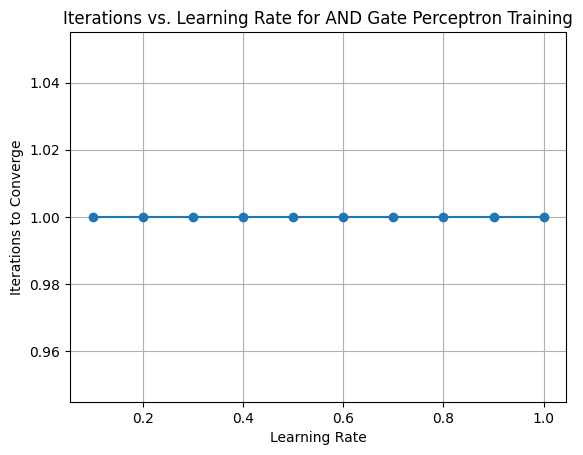

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def step_activation(x):
    return 1 if x >= 0 else 0

initial_weights = np.array([10, 0.2, -0.75])
convergence_error = 0.002
max_epochs = 1000

input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target_output = np.array([0, 0, 0, 1])

# Learning rates to test
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

iterations_to_converge = []

for learning_rate in learning_rates:
    W = initial_weights.copy()
    epochs = 0

    while True:
        error = 0

        for i in range(len(input_data)):
            weighted_sum = W[0] + W[1] * input_data[i, 0] + W[2] * input_data[i, 1]
            predicted_output = step_activation(weighted_sum)
            error = target_output[i] - predicted_output

            W[0] += learning_rate * error
            W[1] += learning_rate * error * input_data[i, 0]
            W[2] += learning_rate * error * input_data[i, 1]

        total_error = np.sum(error ** 2)

        epochs += 1

        if total_error <= convergence_error or epochs >= max_epochs:
            break

    iterations_to_converge.append(epochs)

# Plot the number of iterations vs. learning rates
plt.plot(learning_rates, iterations_to_converge, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations to Converge')
plt.title('Iterations vs. Learning Rate for AND Gate Perceptron Training')
plt.grid()
plt.show()

A4

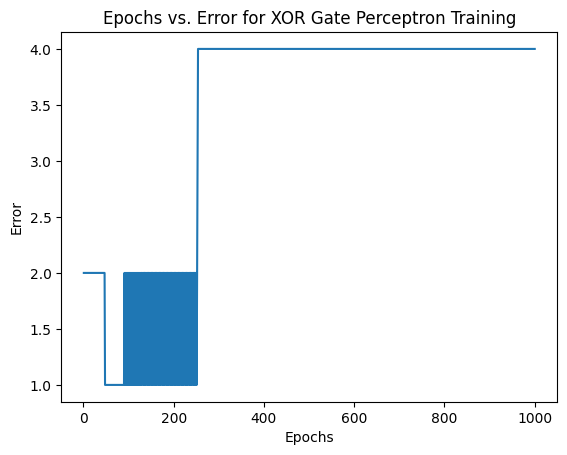

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def step_activation(x):
    return 1 if x > 0 else 0


W0, W1, W2 = 10, 0.2, -0.75
learning_rate = 0.05
max_epochs = 1000
convergence_error = 0.002


X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])


error_values = []


for epoch in range(max_epochs):
    total_error = 0
    for i in range(len(X)):

        weighted_sum = W0 + W1 * X[i, 0] + W2 * X[i, 1]


        output = step_activation(weighted_sum)


        error = y[i] - output


        W0 += learning_rate * error
        W1 += learning_rate * error * X[i, 0]
        W2 += learning_rate * error * X[i, 1]


        total_error += error ** 2


    error_values.append(total_error)


    if total_error <= convergence_error:
        print(f"Converged after {epoch + 1} epochs.")
        break


plt.plot(range(1, len(error_values) + 1), error_values)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs. Error for XOR Gate Perceptron Training')
plt.show()


Training with Bi-Polar Step Activation Function:
Training with Sigmoid Activation Function:
Training with ReLU Activation Function:
Bi-Polar Step did not converge within the maximum 1000 epochs.
Sigmoid did not converge within the maximum 1000 epochs.
ReLU did not converge within the maximum 1000 epochs.


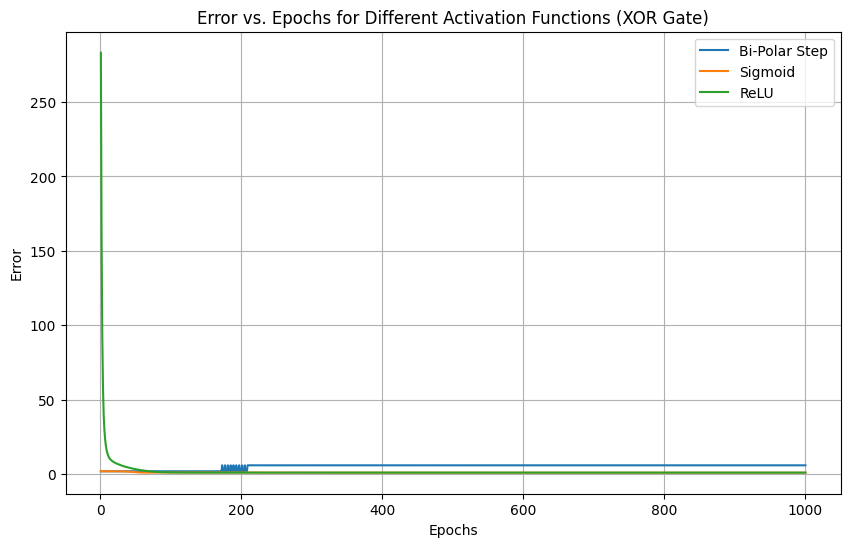

In [9]:
import numpy as np
import matplotlib.pyplot as plt


def step_function(x):
    return 1 if x > 0 else 0

def bipolar_step_function(x):
    return 1 if x > 0 else -1

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def relu_function(x):
    return max(0, x)


W0, W1, W2 = 10, 0.2, -0.75
learning_rate = 0.05
epochs = 1000
convergence_error = 0.002


X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])


activation_functions = [bipolar_step_function, sigmoid_function, relu_function]
activation_names = ["Bi-Polar Step", "Sigmoid", "ReLU"]


iterations_dict = {name: [] for name in activation_names}
error_dict = {name: [] for name in activation_names}


for activation, activation_name in zip(activation_functions, activation_names):

    W0, W1, W2 = 10, 0.2, -0.75

    print(f"Training with {activation_name} Activation Function:")
    error_list = []
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(X)):

            weighted_sum = W0 + W1 * X[i, 0] + W2 * X[i, 1]


            output = activation(weighted_sum)


            error = y[i] - output


            W0 += learning_rate * error
            W1 += learning_rate * error * X[i, 0]
            W2 += learning_rate * error * X[i, 1]

            total_error += error ** 2


        if total_error <= convergence_error:
            print(f"{activation_name}: Converged after {epoch + 1} epochs.")
            iterations_dict[activation_name].append(epoch + 1)
            break
        error_list.append(total_error)

    error_dict[activation_name] = error_list


for activation_name, iterations in iterations_dict.items():
    if iterations:
        print(f"{activation_name} took an average of {np.mean(iterations)} epochs to converge.")
    else:
        print(f"{activation_name} did not converge within the maximum {epochs} epochs.")


plt.figure(figsize=(10, 6))
for activation_name, error_list in error_dict.items():
    plt.plot(range(1, len(error_list) + 1), error_list, label=activation_name)

plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs for Different Activation Functions (XOR Gate)')
plt.legend()
plt.grid()
plt.show()

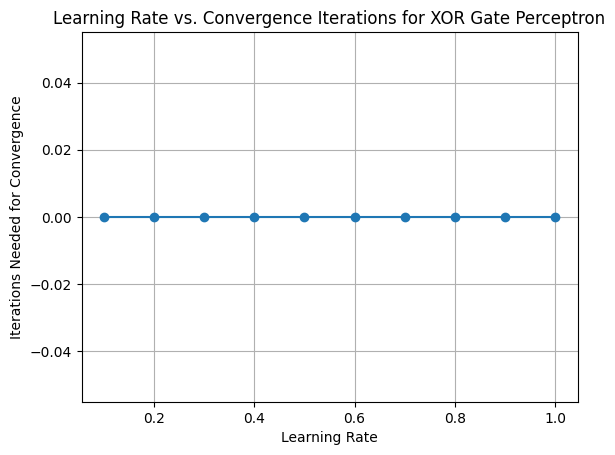

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return 1 if x > 0 else 0

W0, W1, W2 = 10, 0.2, -0.75
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
convergence_error = 0.002
max_epochs = 1000

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

iterations_needed = []


for learning_rate in learning_rates:
    W0, W1, W2 = 10, 0.2, -0.75
    iterations = 0
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            weighted_sum = W0 + W1 * X[i, 0] + W2 * X[i, 1]
            output = step_function(weighted_sum)
            error = y[i] - output
            W0 += learning_rate * error
            W1 += learning_rate * error * X[i, 0]
            W2 += learning_rate * error * X[i, 1]

            total_error += error ** 2

        if total_error <= convergence_error:
            iterations = epoch + 1
            break

    iterations_needed.append(iterations)
plt.plot(learning_rates, iterations_needed, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations Needed for Convergence')
plt.title('Learning Rate vs. Convergence Iterations for XOR Gate Perceptron')
plt.grid(True)
plt.show()


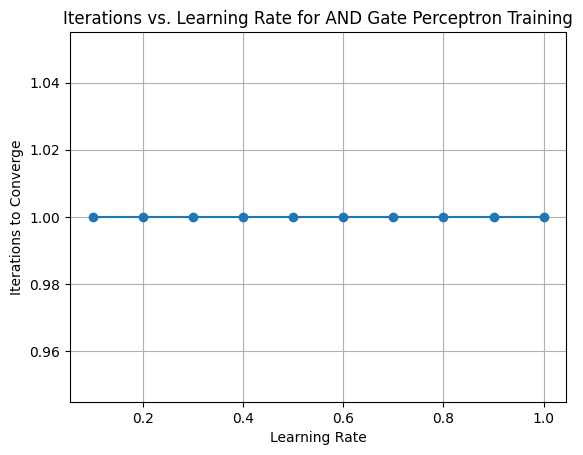

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def step_activation(x):
    return 1 if x >= 0 else 0

initial_weights = np.array([10, 0.2, -0.75])
convergence_error = 0.002
max_epochs = 1000

input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target_output = np.array([0, 0, 0, 1])

# Learning rates to test
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

iterations_to_converge = []

for learning_rate in learning_rates:
    W = initial_weights.copy()
    epochs = 0

    while True:
        error = 0

        for i in range(len(input_data)):
            weighted_sum = W[0] + W[1] * input_data[i, 0] + W[2] * input_data[i, 1]
            predicted_output = step_activation(weighted_sum)
            error = target_output[i] - predicted_output

            W[0] += learning_rate * error
            W[1] += learning_rate * error * input_data[i, 0]
            W[2] += learning_rate * error * input_data[i, 1]

        total_error = np.sum(error ** 2)

        epochs += 1

        if total_error <= convergence_error or epochs >= max_epochs:
            break

    iterations_to_converge.append(epochs)

# Plot the number of iterations vs. learning rates
plt.plot(learning_rates, iterations_to_converge, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations to Converge')
plt.title('Iterations vs. Learning Rate for AND Gate Perceptron Training')
plt.grid()
plt.show()

A5

In [14]:
import pandas as pd
import numpy as np
data = pd.read_excel("Lab Session1 Data .xlsx")
data

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),High Value Tx,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Candy,Mango,Milk
0,C_1,20,6,2,386,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,55.0,18.0
1,C_2,16,3,6,289,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C_3,27,6,2,393,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C_4,19,1,2,110,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C_5,24,4,2,280,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,C_6,22,1,5,167,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,C_7,15,4,2,271,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,C_8,18,4,2,274,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,C_9,21,1,4,148,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,C_10,16,2,4,198,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data = data.iloc[:, 0:6]
data

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),High Value Tx
0,C_1,20,6,2,386,Yes
1,C_2,16,3,6,289,Yes
2,C_3,27,6,2,393,Yes
3,C_4,19,1,2,110,No
4,C_5,24,4,2,280,Yes
5,C_6,22,1,5,167,No
6,C_7,15,4,2,271,Yes
7,C_8,18,4,2,274,Yes
8,C_9,21,1,4,148,No
9,C_10,16,2,4,198,No


In [16]:
d = data.iloc[:, 1:5]
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

labels = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])
perceptron = Perceptron(max_iter=1000, random_state=0)
perceptron.fit(d, labels)
predictions = perceptron.predict(d)

accuracy = accuracy_score(labels, predictions)
print("Model Accuracy:", accuracy)

new_data = np.array([
    [17, 3, 3, 250],
    [23, 5, 1, 320]
])

new_predictions = perceptron.predict(new_data)
print("New Data Predictions:", new_predictions)

Model Accuracy: 0.9
New Data Predictions: [1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


A6

In [17]:
labels = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])
d = np.array(d, dtype = float)
data_pseudo_inv = np.linalg.pinv(d)
weights = np.dot(data_pseudo_inv, labels)

def predict_with_weights(data_point, weights):
    activation = np.dot(data_point, weights)
    return 1 if activation >= 0 else 0

predictions = [predict_with_weights(data_point, weights) for data_point in d]
accuracy = np.mean(predictions == labels)

print("Model Accuracy (Pseudo-Inverse):", accuracy)
new_data = np.array([
    [17, 3, 3, 1],
    [23, 5, 1, 1]
], dtype = float)

new_predictions = [predict_with_weights(data_point, weights) for data_point in new_data]
print("New Data Predictions (Pseudo-Inverse):", new_predictions)

Model Accuracy (Pseudo-Inverse): 0.7
New Data Predictions (Pseudo-Inverse): [0, 0]


A7

In [18]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_der(x):
    return x * (1 - x)

learning_rate = 0.05

inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [0], [0], [1]])

ip_n = 2
hn_n = 4
op_n = 1

itrns = 1000
np.random.seed(0)
weights_ip_hn = np.random.uniform(size=(ip_n, hn_n))
biases_hn = np.random.uniform(size=(1, hn_n))
weights_hn_op = np.random.uniform(size=(hn_n, op_n))
biases_op = np.random.uniform(size=(1, op_n))

for i in range(itrns):
    hn_l_ip = np.dot(inputs, weights_ip_hn) + biases_hn
    hn_l_op = sigmoid(hn_l_ip)
    op_l_ip = np.dot(hn_l_op, weights_hn_op) + biases_op
    op_l_op = sigmoid(op_l_ip)

    error = targets - op_l_op

    if np.max(np.abs(error)) <= 0.002:
        print(f"Converged at iteration {i}")
        break

    delta_op = error * sigmoid_der(op_l_op)
    error_hn = delta_op.dot(weights_hn_op.T)
    delta_hn = error_hn * sigmoid_der(hn_l_op)

    weights_hn_op += hn_l_op.T.dot(delta_op) * learning_rate
    biases_op += np.sum(delta_op, axis=0, keepdims=True) * learning_rate
    weights_ip_hn += inputs.T.dot(delta_hn) * learning_rate
    biases_hn += np.sum(delta_hn, axis=0, keepdims=True) * learning_rate

predicted_output = op_l_op.round()
print("Predicted Output:")
print(predicted_output)

Predicted Output:
[[0.]
 [0.]
 [0.]
 [0.]]


A8

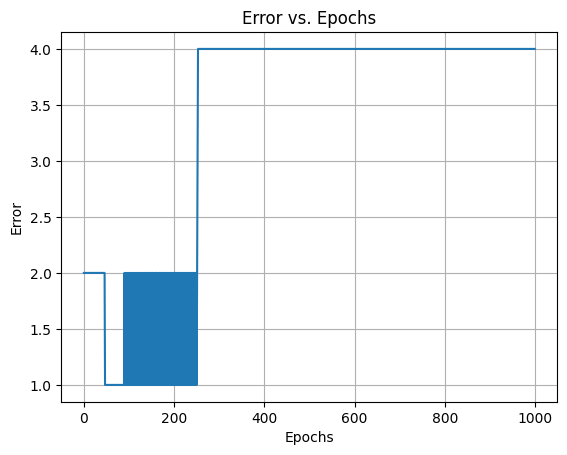

Learned Weights:
[ 0.1 -0.1 -0.1]


In [19]:
import numpy as np
import matplotlib.pyplot as plt

W = np.array([10, 0.2, -0.75])
learning_rate = 0.05

ip = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
tgts = np.array([0, 1, 1, 0])

def bin_step(x):
    return 1 if x >= 0 else 0

def sum_sq_error(pred, tgts):
    return np.sum((pred - tgts) ** 2)

error_val = []
epochs = []

max_epochs = 1000
convergence_error = 0.002

for epoch in range(max_epochs):
    total_error = 0
    for i in range(len(ip)):
        ip_data = np.insert(ip[i], 0, 1)
        net = np.dot(ip_data, W)
        pred = bin_step(net)
        error = tgts[i] - pred
        total_error += error ** 2
        W += learning_rate * error * ip_data
    error_val.append(total_error)
    epochs.append(epoch)

    if total_error <= convergence_error:
        print(f"Converged at epoch {epoch}")
        break

plt.plot(epochs, error_val)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs')
plt.grid()
plt.show()

print("Learned Weights:")
print(W)

A9

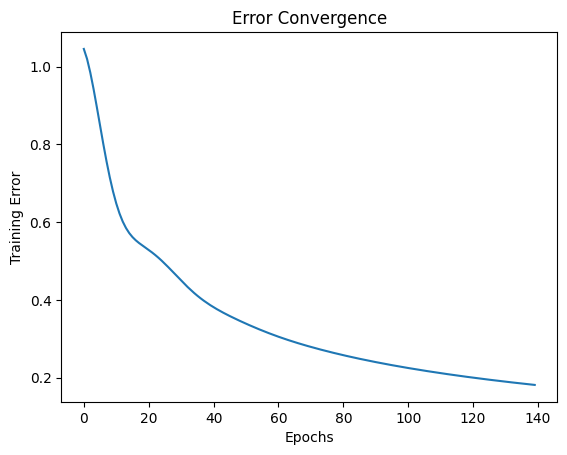

Converged after 140 epochs.


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier


X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 0, 0, 1])


mlp = MLPClassifier(hidden_layer_sizes=(), activation='identity', solver='sgd',
                    learning_rate_init=0.05, max_iter=1000, tol=1e-3, random_state=42)


mlp.fit(X, Y)


error_history = mlp.loss_curve_


plt.plot(range(len(error_history)), error_history)
plt.xlabel('Epochs')
plt.ylabel('Training Error')
plt.title('Error Convergence')
plt.show()


converged_epoch = len(error_history)
if error_history[-1] <= 0.002:
    converged_epoch = error_history.index(next(e for e in error_history if e <= 0.002))

print(f"Converged after {converged_epoch} epochs.")

A10

In [ ]:
from sklearn.neural_network import MLPClassifier


X_and = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_and = [0, 0, 0, 1]


clf_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', random_state=1)


clf_and.fit(X_and, y_and)


accuracy_and = clf_and.score(X_and, y_and)


predictions_and = clf_and.predict(X_and)


print("AND Gate Results:")
print("Actual:", y_and)
print("Predicted:", predictions_and)
print("Accuracy:", accuracy_and)

X_xor = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_xor = [0, 1, 1, 0]

clf_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', random_state=1)

clf_xor.fit(X_xor, y_xor)

accuracy_xor = clf_xor.score(X_xor, y_xor)


predictions_xor = clf_xor.predict(X_xor)

print("\nXOR Gate Results:")
print("Actual:", y_xor)
print("Predicted:", predictions_xor)
print("Accuracy:", accuracy_xor)


AND Gate Results:
Actual: [0, 0, 0, 1]
Predicted: [0 0 0 1]
Accuracy: 1.0

XOR Gate Results:
Actual: [0, 1, 1, 0]
Predicted: [0 1 0 1]
Accuracy: 0.5


A11

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report


data = pd.read_csv('Train_data.csv')


X = data.drop('class', axis=1)
y = data['class']


categorical_cols = ['protocol_type', 'service', 'flag']
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)


mlp_classifier.fit(X_train, y_train)


y_pred = mlp_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


print(classification_report(y_test, y_pred))


Accuracy: 0.99
              precision    recall  f1-score   support

     anomaly       0.99      1.00      0.99      2365
      normal       1.00      0.99      1.00      2674

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039

